# Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [2]:
# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Preprocessing

In [6]:
## Drop irrelevent columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Label Encoding

In [8]:
# Encoding Gender
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# One Hot ENcoding for Geography
ohe = OneHotEncoder(sparse_output=False)
geo_encoder = ohe.fit_transform(df[['Geography']])
# geo_encoder

In [17]:
# To get the feature names for Geography
ohe.get_feature_names_out(input_features=['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [19]:
# Converting the OHE values into DataFrame so that we can add it into the origina Data
geo_encoded_df = pd.DataFrame(data=geo_encoder, columns=ohe.get_feature_names_out(input_features=['Geography']))

In [21]:
geo_encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


##### Combine OHE column with original data

In [24]:
data = pd.concat(objs=[df.drop('Geography', axis=1), geo_encoded_df], axis=1)

In [26]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


#### Now we have to save the LabelEncoder and OneHotEncoder we have used to use it during pipeline for the test data.

In [29]:
# Save the encoders and scalers

# gender encoder
with open(file='label_encoder_gender.pkl',mode='wb') as file:
    pickle.dump(obj=label_encoder_gender, file=file)

# geography encoder
with open(file='ohe_geo.pkl', mode='wb') as file:
    pickle.dump(obj=ohe, file=file)

### Divide for DEPENDENT and INDEPENDENT features

In [32]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [34]:
X = data.drop('Exited', axis=1)
y = data['Exited']

### Spilitting data into Training and Testing data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, y_train.shape

((8000, 12), (8000,))

### SCALING

In [42]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Saving the Scaler into pkl file
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [48]:
# This will also be out input for the neurons
(X_train.shape[1],)

(12,)

# ANN Implementation

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

#### Build ANN Model

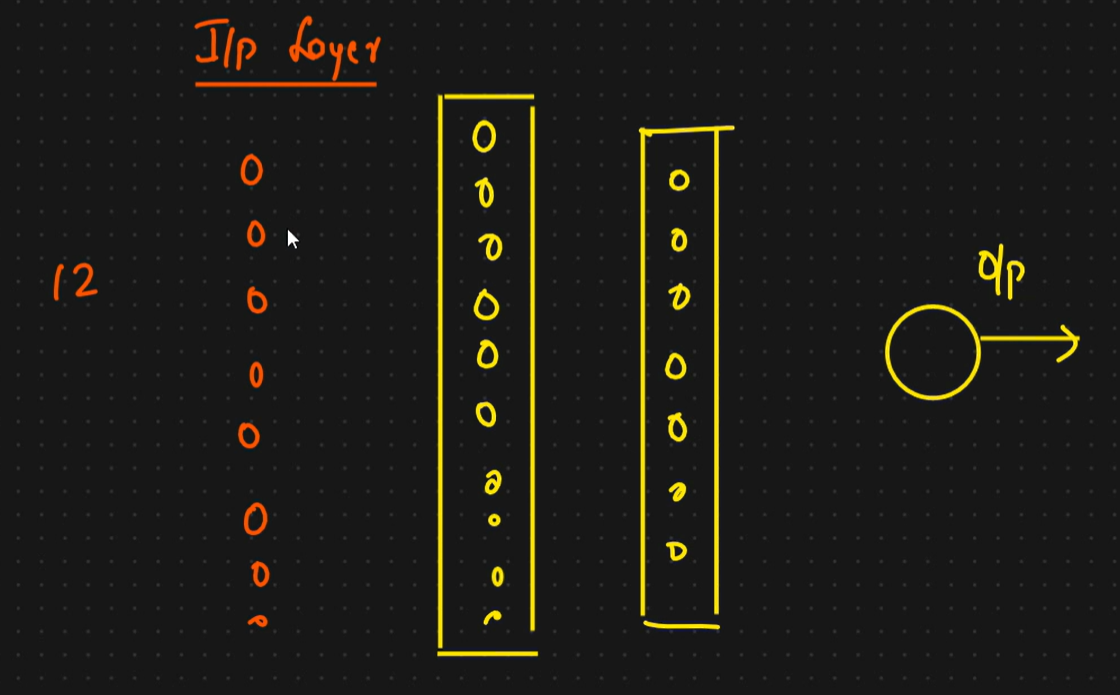

In [53]:
# Initialize model
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)), ## HL1-> connected with input layer
    Dense(units=32, activation='relu'), ## HL2
    Dense(units=1, activation='sigmoid')
])

C:\Users\shash\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# For varibale learning of optimizers in ADAM
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy

In [64]:
# Compiling the model
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=['accuracy']
)

#### Setting up the Tensorboard

In [67]:
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# tensorflow callback
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [69]:
# Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### Training the Model

In [72]:
history = model.fit(
            x=X_train, 
            y=y_train,
            validation_data=(X_test, y_test),
            epochs=100,
            callbacks=[tensorflow_callback, early_stopping_callback]
        )

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8058 - loss: 0.4449 - val_accuracy: 0.8485 - val_loss: 0.3592
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.3606 - val_accuracy: 0.8590 - val_loss: 0.3439
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3382 - val_accuracy: 0.8610 - val_loss: 0.3408
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3422 - val_accuracy: 0.8550 - val_loss: 0.3449
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8613 - loss: 0.3392 - val_accuracy: 0.8595 - val_loss: 0.3412
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3250 - val_accuracy: 0.8585 - val_loss: 0.3477
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.3188 - val_accuracy: 0.8580 - val_loss: 0.3400
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8609 - loss: 0.3325 - val_accu

In [74]:
model.save('model.h5')

In [80]:
# Lead tensorboard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [98]:
%reload_ext tensorboard

In [118]:
%tensorboard --logdir logs/fit --port 6007

Reusing TensorBoard on port 6007 (pid 524), started 0:03:13 ago. (Use '!kill 524' to kill it.)